In [1]:
import cv2
import pandas as pd
from deepface import DeepFace
from tqdm import tqdm
import matplotlib.pyplot as plt


In [2]:
cd "C:\碩二上\心理與神經資訊學\computer-vision-realtjr"

C:\碩二上\心理與神經資訊學\computer-vision-realtjr


In [3]:
video_path = "test.mp4"   # ← 改成你的路徑
cap = cv2.VideoCapture(video_path)

fps = cap.get(cv2.CAP_PROP_FPS)
total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
duration = total_frames / fps

print("FPS:", fps)
print("Total frames:", total_frames)
print("Duration (sec):", duration)


FPS: 30.0
Total frames: 711
Duration (sec): 23.7


In [4]:
results = []

# 每秒擷取 1 frame
for sec in tqdm(range(int(duration))):
    cap.set(cv2.CAP_PROP_POS_MSEC, sec * 1000)

    ret, frame = cap.read()
    if not ret:
        results.append([sec, "no_frame", {}])
        continue

    try:
        analyze = DeepFace.analyze(
            frame,
            actions=["emotion"],
            enforce_detection=False
        )
        
        emotion = analyze[0]["dominant_emotion"]
        all_scores = analyze[0]["emotion"]

        results.append([sec, emotion, all_scores])

        print(sec, "sec →", emotion)

    except Exception as e:
        print(sec, "sec Error:", e)
        results.append([sec, "error", {}])

cap.release()


  4%|▍         | 1/23 [00:01<00:24,  1.14s/it]

0 sec → sad


  9%|▊         | 2/23 [00:01<00:13,  1.58it/s]

1 sec → happy


 13%|█▎        | 3/23 [00:01<00:09,  2.06it/s]

2 sec → neutral


 17%|█▋        | 4/23 [00:02<00:07,  2.47it/s]

3 sec → neutral


 22%|██▏       | 5/23 [00:02<00:06,  2.84it/s]

4 sec → sad


 26%|██▌       | 6/23 [00:02<00:05,  3.02it/s]

5 sec → sad


 30%|███       | 7/23 [00:02<00:04,  3.35it/s]

6 sec → neutral


 35%|███▍      | 8/23 [00:03<00:04,  3.52it/s]

7 sec → happy


 39%|███▉      | 9/23 [00:03<00:03,  3.58it/s]

8 sec → fear


 43%|████▎     | 10/23 [00:03<00:03,  3.62it/s]

9 sec → fear


 48%|████▊     | 11/23 [00:03<00:03,  3.67it/s]

10 sec → sad


 52%|█████▏    | 12/23 [00:04<00:03,  3.48it/s]

11 sec → neutral


 57%|█████▋    | 13/23 [00:04<00:02,  3.55it/s]

12 sec → neutral


 61%|██████    | 14/23 [00:04<00:02,  3.54it/s]

13 sec → neutral


 65%|██████▌   | 15/23 [00:05<00:02,  3.48it/s]

14 sec → neutral


 70%|██████▉   | 16/23 [00:05<00:02,  3.42it/s]

15 sec → sad


 74%|███████▍  | 17/23 [00:05<00:01,  3.34it/s]

16 sec → neutral


 78%|███████▊  | 18/23 [00:05<00:01,  3.30it/s]

17 sec → neutral


 83%|████████▎ | 19/23 [00:06<00:01,  3.36it/s]

18 sec → neutral


 87%|████████▋ | 20/23 [00:06<00:00,  3.38it/s]

19 sec → sad


 91%|█████████▏| 21/23 [00:06<00:00,  3.40it/s]

20 sec → sad


 96%|█████████▌| 22/23 [00:07<00:00,  3.53it/s]

21 sec → neutral


100%|██████████| 23/23 [00:07<00:00,  3.13it/s]

22 sec → neutral


In [5]:
df = pd.DataFrame(results, columns=["time_sec", "dominant_emotion", "scores"])
df.to_csv("test_emotions.csv", index=False)
df.head()


,time_sec,dominant_emotion,scores
0,0,sad,"{'angry': 0.04453223929746385, 'disgust': 1.17..."
1,1,happy,"{'angry': 0.027903716961551243, 'disgust': 1.6..."
2,2,neutral,"{'angry': 0.5471150251248494, 'disgust': 6.082..."
3,3,neutral,"{'angry': 0.24465294554829597, 'disgust': 0.03..."
4,4,sad,"{'angry': 0.23396622394427968, 'disgust': 2.58..."


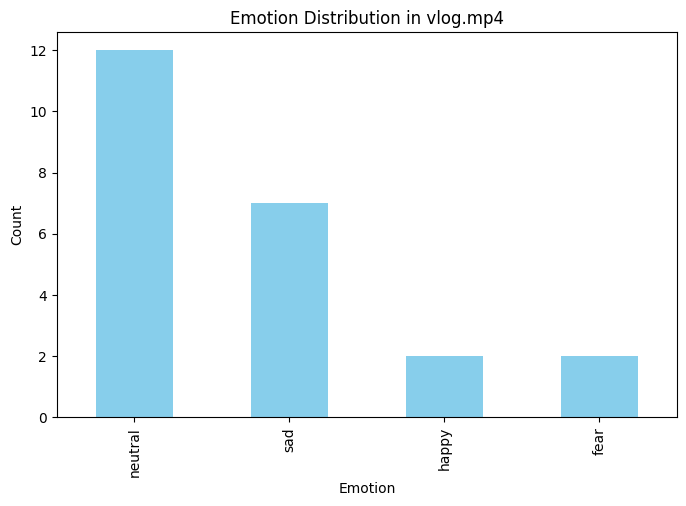

In [6]:
plt.figure(figsize=(8,5))
df["dominant_emotion"].value_counts().plot(kind="bar", color="skyblue")
plt.title("Emotion Distribution in vlog.mp4")
plt.xlabel("Emotion")
plt.ylabel("Count")
plt.show()


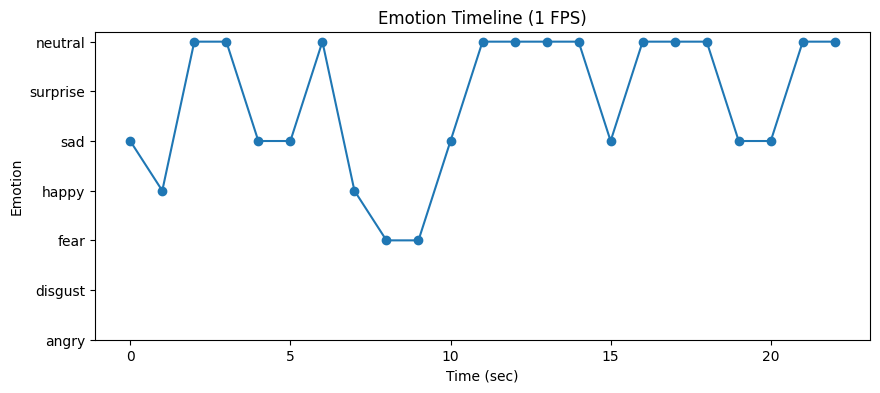

In [7]:
emo_map = { 
    "angry": 0,
    "disgust": 1,
    "fear": 2,
    "happy": 3,
    "sad": 4,
    "surprise": 5,
    "neutral": 6,
    "error": None,
    "no_frame": None
}

df["emo_code"] = df["dominant_emotion"].map(emo_map)

# 只保留有數值的情緒 (0~6)，不要包含 None
valid_ticks = [v for v in emo_map.values() if isinstance(v, int)]
valid_labels = [k for k, v in emo_map.items() if isinstance(v, int)]

plt.figure(figsize=(10,4))
plt.plot(df["time_sec"], df["emo_code"], marker="o")

plt.yticks(valid_ticks, valid_labels)

plt.title("Emotion Timeline (1 FPS)")
plt.xlabel("Time (sec)")
plt.ylabel("Emotion")
plt.show()
